___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [2]:
from tensorflow.keras.datasets import fashion_mnist


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [5]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [6]:
x_train.shape


(60000, 28, 28)

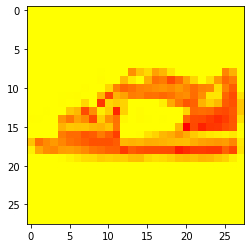

In [15]:
plt.imshow(x_train[13], cmap='autumn_r');


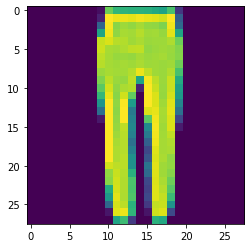

In [8]:
plt.imshow(x_train[2023]);


# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [16]:
x_train[0].min(), x_train[0].max()

(0, 255)

In [17]:
x_train = x_train/255
x_test =  x_test/255

In [18]:
x_train.shape , y_train.shape


((60000, 28, 28), (60000,))

In [19]:
x_train[0].shape

(28, 28)

In [20]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [21]:
x_train[0].min(), x_train[0].max()

(0.0, 1.0)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [22]:
x_train = x_train.reshape(60000,28,28,1)

In [23]:
x_test = x_test.reshape(10000,28,28,1)

In [24]:
x_train[5].shape

(28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
y_cat_train = to_categorical(y_train, num_classes=10)

In [27]:
y_cat_test = to_categorical(y_test, num_classes=10)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [30]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               1

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [47]:
x_train.shape, y_cat_train.shape

((60000, 28, 28, 1), (60000, 10))

In [48]:
x_test.shape, y_cat_test.shape

((10000, 28, 28, 1), (10000, 10))

In [49]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1,restore_best_weights=True)

In [50]:
fitted_model = model.fit(x=x_train, y=y_cat_train,
                         validation_data=(x_test, y_cat_test),
                         callbacks=[early_stopping],
                         epochs=10,
                         verbose=1)

Epoch 1/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2280 - accuracy: 0.9205 - val_loss: 0.4094 - val_accuracy: 0.8905
Epoch 2/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.2323 - accuracy: 0.9203 - val_loss: 0.3617 - val_accuracy: 0.8861
Epoch 3/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.2332 - accuracy: 0.9198 - val_loss: 0.3304 - val_accuracy: 0.8934
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2342 - accuracy: 0.9186 - val_loss: 0.3778 - val_accuracy: 0.8812
Epoch 5/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.2380 - accuracy: 0.9189 - val_loss: 0.3540 - val_accuracy: 0.8787
Epoch 6/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2363 - accuracy: 0.9191 - val_loss: 0.5142 - val_accuracy: 0.8862
Epoch 7/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2411 - accuracy: 0.9187 - val_loss: 0.5520 -

**TASK 7: Plot values of metrics you used in your model.**

In [37]:
model.metrics_names


['loss', 'accuracy']

In [38]:
model.evaluate(x_test, y_cat_test, verbose=0)


[0.334121435880661, 0.887499988079071]

In [39]:
metrics = pd.DataFrame(fitted_model.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.428614,0.843200,0.406746,0.8534
1,0.308179,0.887333,0.327883,0.8754
2,0.273599,0.900350,0.321162,0.8841
3,0.254660,0.906367,0.312275,0.8911
4,0.241404,0.912750,0.302663,0.8978


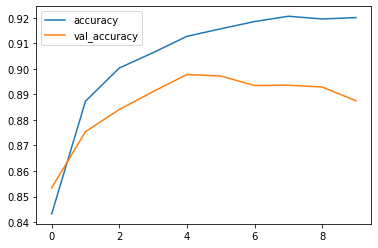

In [42]:
metrics[['accuracy', 'val_accuracy']].plot();

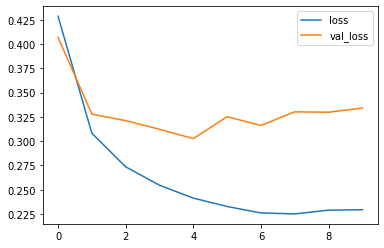

In [43]:
metrics[['loss', 'val_loss']].plot();


## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [44]:
from sklearn.metrics import classification_report, confusion_matrix


In [45]:
predictions = np.argmax(model.predict(x_test), axis=-1)


313/313 [==============================] - 3s 10ms/step


In [46]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.82      0.82      1000
           3       0.91      0.89      0.90      1000
           4       0.82      0.78      0.80      1000
           5       0.98      0.97      0.98      1000
           6       0.62      0.78      0.69      1000
           7       0.96      0.95      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [52]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


## Prediction

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___